In [1]:
import pandas as pd
import numpy as np

names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                header=None, names=names , delim_whitespace = True, na_values='?')

df.head(5)

"""
Attribute Information:
    1.  CRIM      per capita crime rate by town
    2.  ZN        proportion of residential land zoned for lots over 
                  25,000 sq.ft.
    3.  INDUS     proportion of non-retail business acres per town
    4.  CHAS      Charles River dummy variable (= 1 if tract bounds 
                  river; 0 otherwise)
    5.  NOX       nitric oxides concentration (parts per 10 million)
    6.  RM        average number of rooms per dwelling
    7.  AGE       proportion of owner-occupied units built prior to 1940
    8.  DIS       weighted distances to five Boston employment centres
    9.  RAD       index of accessibility to radial highways
    10. TAX       full-value property-tax rate per $10,000
    11. PTRATIO   pupil-teacher ratio by town
    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blocks by town
    13. LSTAT     % lower status of the population
    14. MEDV      Median value of owner-occupied homes in $1000's
"""



"\nAttribute Information:\n    1.  CRIM      per capita crime rate by town\n    2.  ZN        proportion of residential land zoned for lots over \n                  25,000 sq.ft.\n    3.  INDUS     proportion of non-retail business acres per town\n    4.  CHAS      Charles River dummy variable (= 1 if tract bounds \n                  river; 0 otherwise)\n    5.  NOX       nitric oxides concentration (parts per 10 million)\n    6.  RM        average number of rooms per dwelling\n    7.  AGE       proportion of owner-occupied units built prior to 1940\n    8.  DIS       weighted distances to five Boston employment centres\n    9.  RAD       index of accessibility to radial highways\n    10. TAX       full-value property-tax rate per $10,000\n    11. PTRATIO   pupil-teacher ratio by town\n    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blocks by town\n    13. LSTAT     % lower status of the population\n    14. MEDV      Median value of owner-occupied homes in $1000's\n"

In [2]:
print(df.shape)

(506, 14)


In [3]:
y = df['PRICE'].values
x = df['RM'].values

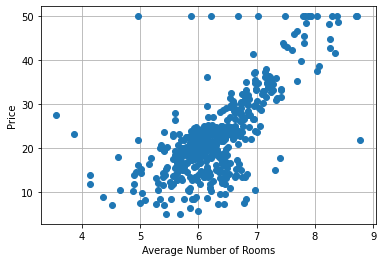

In [4]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price')
plt.grid()

# Guess a line to fit the data

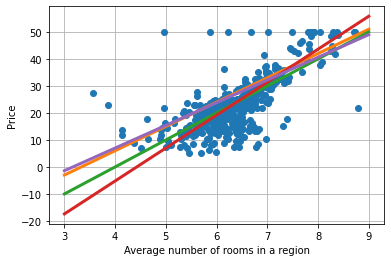

In [5]:
w1 = 9
w0 = -30
xplt = np.linspace(3,9,100)
yplt = w1*xplt + w0
plt.plot(x,y,'o')    # Plot the data points

plt.plot(xplt,yplt,'-',linewidth=3)  # Plot the line
plt.xlabel('Average number of rooms in a region')
plt.ylabel('Price')
plt.grid()

## A few lines students have came up with
yplt2 = 10*xplt - 40
plt.plot(xplt,yplt2,'-',linewidth=3) 

yplt3 = 12.2*xplt - 54
plt.plot(xplt,yplt3,'-',linewidth=3) 

yplt4 = 8.4*(xplt - 4) + 7
plt.plot(xplt,yplt4,'-',linewidth=3) 

# Pause for the lecture

# Calculate the Mean Squared Error (MSE) to determine goodness of fit

In [6]:
yhat = 9*x-30
MSE = np.mean((y-yhat)**2)
yhat2 = 12.2*x-54
MSE2 = np.mean((y-yhat2)**2)
print(MSE)
print(MSE2)

59.83774942094861
48.34843803059288


In [7]:
## Mean Aboslute Error
print(np.mean(np.abs(y-yhat)))

5.807100790513834


# Pause for the lecture

## Calculate the Least Square Solution

w1=  9.10210898118031 w0=  -34.67062077643857
MSE:  43.60055177116956
Root MSE:  6.603071389222561


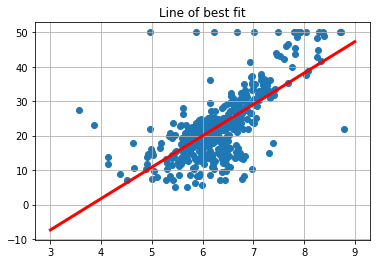

In [8]:
meanx = np.mean(x)
meany = np.mean(y)
varx = np.var(x)
covxy = np.mean((x-meanx)*(y-meany))

w1 = covxy/varx
w0 = meany - w1*meanx
print('w1= ',w1,'w0= ',w0)

x_new = np.linspace(3,9,100)
y_new = w0 + w1*x_new

plt.plot(x_new, y_new, c='red', linewidth = 3)
plt.scatter(x,y)
plt.grid()
plt.title('Line of best fit')

yhat = w0 + w1*x
MSE = np.mean((y - yhat)**2)
print('MSE: ', MSE)
print('Root MSE: ', np.sqrt(MSE))


### Use sklearn to perform the linear regression

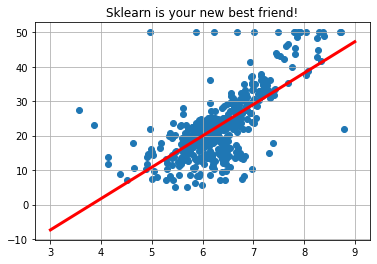

In [9]:
## Results in the same line as the previous section
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1),y.reshape(-1,1))

y_new = regr.predict(x_new.reshape(-1,1))
plt.figure()
plt.plot(x_new,y_new, c='red', linewidth = 3)
plt.scatter(x,y)
plt.grid()
plt.title('Sklearn is your new best friend!');